In [3]:
# 使用PageRank对往来邮件中的任务进行影响力分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
# 数据加载
emails = pd.read_csv("Emails.csv")
aliases_file = pd.read_csv("Aliases.csv")
persons_file = pd.read_csv("Persons.csv")

In [11]:
# 数据探索,查看emails列名
for column in emails:
    print(column)

Id
DocNumber
MetadataSubject
MetadataTo
MetadataFrom
SenderPersonId
MetadataDateSent
MetadataDateReleased
MetadataPdfLink
MetadataCaseNumber
MetadataDocumentClass
ExtractedSubject
ExtractedTo
ExtractedFrom
ExtractedCc
ExtractedDateSent
ExtractedCaseNumber
ExtractedDocNumber
ExtractedDateReleased
ExtractedReleaseInPartOrFull
ExtractedBodyText
RawText


In [15]:
aliases = {}
for index,row in aliases_file.iterrows():
    aliases[row['Alias']]=row['PersonId']
print(aliases)

{'111th congress': 1, 'agna usemb kabul afghanistan': 2, 'ap': 3, 'asuncion': 4, 'alec': 5, 'dupuy alex': 6, 'american beverage association': 7, 'mayock andrew': 8, 'shapiro andrew j': 9, 'shapiroa@state.gov': 9, 'slaughter annmarie': 10, 'slaughter anne marie': 10, 'slaughter annemarie': 10, 'slaughtera@state.gov': 10, 'lake anthony': 11, 'valenzuela arturo a': 12, 'valenzuelaaa@state.gov': 12, 'kimoon ban': 13, 'obama barack': 14, 'president': 14, 'bam@mikulski.senate.gov': 15, 'mikulski bam': 15, 'mikulski bam (mikulski)': 15, 'mikulski bam (mitkulski)': 15, 'mikulskibam (mikulski)': 15, 'betsy.ebeling': 16, 'ebeling betsy': 16, 'betsyebeling': 16, 'betsyebeling1050': 16, 'clinton william j': 17, 'dad': 17, 'biography': 18, 'klehr bonnie': 19, 'brian': 20, 'bstrider': 21, 'strider burns': 21, 'capricia marshall': 22, 'marshall capricia': 22, 'marshall capricia p': 22, 'capriciamarshall': 22, 'capriciamarshall@': 22, 'cmarshall': 22, 'marshallcp@state.gov': 22, 'pascual carlos': 23, 

In [16]:
# 读取人名文件
persons = {}
for index,row in persons_file.iterrows():
    persons[row['Id']] = row['Name']
print(persons)

{1: '111th Congress', 2: 'AGNA USEMB Kabul Afghanistan', 3: 'AP', 4: 'ASUNCION', 5: 'Alec', 6: 'Alex Dupuy', 7: 'American Beverage Association', 8: 'Andrew Mayock', 9: 'Andrew Shapiro', 10: 'Anne-Marie Slaughter', 11: 'Anthony Lake', 12: 'Arturo Valenzuela', 13: 'Ban Ki-moon', 14: 'Barack Obama', 15: 'Barbara Mikulski', 16: 'Betsy Ebeling', 17: 'Bill Clinton', 18: 'Biography', 19: 'Bonnie Klehr', 20: 'Brian Greenspun', 21: 'Burns Strider', 22: 'Capricia Marshall', 23: 'Carlos Pascual', 24: 'Caroline Adler', 25: 'Case Button', 26: 'Cecile Richards', 27: 'Chad Weston', 28: 'Charles Kiamie', 29: 'Chelsea Clinton', 30: 'Cherie Blair', 31: 'Cheryl', 32: 'Cheryl Mills', 33: 'Chester Crocker', 34: 'Christopher Butzgy', 35: 'Christopher Edwards', 36: 'Christopher Green', 37: 'Christopher Hill', 38: 'Claire Coleman', 39: 'Colin Powell', 40: 'Council on Foreign Relations', 41: 'Courtney Beale', 42: 'Craig Kelly', 43: 'Daily Sun', 44: 'Dana Hyde', 45: 'Daniel', 46: 'Daniel Baer', 47: 'Daniel Inon

In [26]:
print(emails['MetadataFrom'][0:20])
print(len(emails['MetadataFrom']))

0         Sullivan, Jacob J
1                       NaN
2           Mills, Cheryl D
3           Mills, Cheryl D
4                         H
5                         H
6           Mills, Cheryl D
7                         H
8         Sullivan, Jacob J
9                       NaN
10        Sullivan, Jacob J
11                      NaN
12        Sullivan, Jacob J
13    Slaughter, Anne-Marie
14          Mills, Cheryl D
15       Koh, Harold Hongju
16         Sherman, Wendy R
17         Sherman, Wendy R
18        Sullivan, Jacob J
19        Sullivan, Jacob J
Name: MetadataFrom, dtype: object
7945


In [27]:
# 对别名进行转换
def unify_name(name):
    name = str(name).lower()
    name = name.replace(",","").split("@")[0]
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

In [28]:
emails['MetadataFrom'] = emails['MetadataFrom'].apply(unify_name)
emails['MetadataTo'] = emails['MetadataTo'].apply(unify_name)

In [33]:
# 把图的edge的权重设置为发邮件的次数
from collections import defaultdict
edges_weights_temp = defaultdict(list)
print(edges_weights_temp)

defaultdict(<class 'list'>, {})


In [39]:
for row in zip(emails['MetadataFrom'],emails["MetadataTo"]):
    temp = (row[0],row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp]=1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp]+1
#print(edges_weights_temp)
edges_weights = [(key[0],key[1],value) for key,value in edges_weights_temp.items()]
print(edges_weights[0:10])

[('Jake Sullivan', 'Hillary Clinton', 4075), ('nan', 'Hillary Clinton', 100), ('Cheryl Mills', ';h', 5), ('Cheryl Mills', 'Hillary Clinton', 5910), ('Hillary Clinton', 'Huma Abedin', 160), ('Hillary Clinton', 'russorv', 130), ('slaughter anne-marie', 'Hillary Clinton', 630), ('Harold Hongju Koh', 'Hillary Clinton', 60), ('Wendy Sherman', 'Hillary Clinton', 35), ('Jake Sullivan', 'Wendy Sherman', 5)]


In [45]:
graph = nx.DiGraph() # 创建带权重的有向图
graph.add_weighted_edges_from(edges_weights)
pagerank = nx.pagerank(graph) # 计算每个人的PR值
pagerank_list = {node:rank for node,rank in pagerank.items()}
print(pagerank_list)
nx.set_node_attributes(graph,name="pagerank",values=pagerank_list)

{'Jake Sullivan': 0.005791704166582624, 'Hillary Clinton': 0.30625575336382416, 'nan': 0.13999227061446815, 'Cheryl Mills': 0.009358382485728864, ';h': 0.0008967850871949974, 'Huma Abedin': 0.010664457957706461, 'russorv': 0.004414888802206403, 'slaughter anne-marie': 0.001411729861610798, 'Harold Hongju Koh': 0.0009914506387867286, 'Wendy Sherman': 0.0011673799493548969, 'sullivanjj': 0.040032942578700645, 'Sidney Blumenthal': 0.007543328643239068, 'Burns Strider': 0.0010366588039860962, 'Robert Russo': 0.0008904426392777106, 'Capricia Marshall': 0.0017166548334911842, 'Oscar Flores': 0.0016529953921252999, 'William Burns': 0.0011615538825799176, 'Monica Hanley': 0.0008904426392777106, 'abedinh': 0.04865794676080488, 'millscd': 0.04143526549410853, 'Daniel Schwerin': 0.0009243019859440611, 'hanleymr': 0.005370314170153694, 'Philippe Reines': 0.009023759500896596, 'Thomas Nides': 0.0009399158462110825, 'jilotylc': 0.03160717295021766, 'Melanne Verveer': 0.002245998855788746, 'Claire Co

In [55]:
# 画出网络图
def show_graph(graph,type="spring_layout"):
    positions = nx.spring_layout(graph)
    if type=="string_layout":
        positions = nx.spring_layout(graph)
    if type=="circular_layout":
        positions = nx.circular_layout(graph)
    # 设置图中的节点大小，与pagerank相关
    nodesize = [node['pagerank']*20000 for v,node in graph.nodes(data=True)]
    # 设置边的长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph,pos=positions,node_size=nodesize,alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph,pos=positions,edge_size=edgesize,alpha=0.2)
    # 绘制节点的标签
    nx.draw_networkx_labels(graph,pos=positions,font_size=10)
    plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Administrator\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


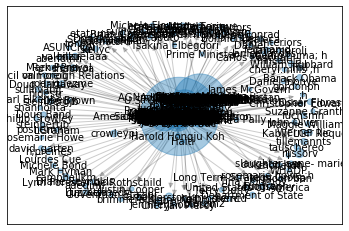

In [56]:
show_graph(graph)

In [57]:
# 将完整图谱进行精简
print(len(persons_file))
# 共513个人，平均每个人影响力为0.006535

513


In [58]:
print(pagerank_list)

{'Jake Sullivan': 0.005791704166582624, 'Hillary Clinton': 0.30625575336382416, 'nan': 0.13999227061446815, 'Cheryl Mills': 0.009358382485728864, ';h': 0.0008967850871949974, 'Huma Abedin': 0.010664457957706461, 'russorv': 0.004414888802206403, 'slaughter anne-marie': 0.001411729861610798, 'Harold Hongju Koh': 0.0009914506387867286, 'Wendy Sherman': 0.0011673799493548969, 'sullivanjj': 0.040032942578700645, 'Sidney Blumenthal': 0.007543328643239068, 'Burns Strider': 0.0010366588039860962, 'Robert Russo': 0.0008904426392777106, 'Capricia Marshall': 0.0017166548334911842, 'Oscar Flores': 0.0016529953921252999, 'William Burns': 0.0011615538825799176, 'Monica Hanley': 0.0008904426392777106, 'abedinh': 0.04865794676080488, 'millscd': 0.04143526549410853, 'Daniel Schwerin': 0.0009243019859440611, 'hanleymr': 0.005370314170153694, 'Philippe Reines': 0.009023759500896596, 'Thomas Nides': 0.0009399158462110825, 'jilotylc': 0.03160717295021766, 'Melanne Verveer': 0.002245998855788746, 'Claire Co

In [59]:
# 设置pr值的阈值，选择大于阈值的重要核心节点
pagerank_threshold = 0.007
small_graph = graph.copy()
for n,p_rank in graph.nodes(data=True):
    if p_rank['pagerank']<pagerank_threshold:
        small_graph.remove_node(n)

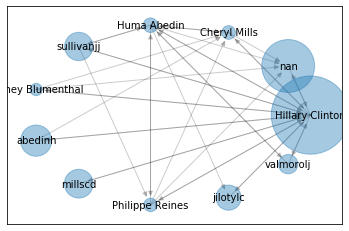

In [60]:
show_graph(small_graph,"circular_layout")

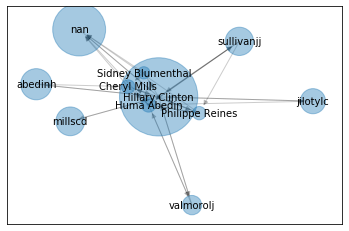

In [61]:
show_graph(small_graph,"spring_layout")